# Li on BCC lattice

In [1]:
# ----------------------------------------------------
# 3D model of Li on bcc lattice, with s orbitals only
# ----------------------------------------------------

from __future__ import print_function # python3 style print
from pythtb import * # import TB model class

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
%matplotlib inline
rcParams.update({"text.usetex": True, "font.size": 16})

In [2]:
# define lattice vectors
lat=[[-0.5, 0.5, 0.5],[ 0.5,-0.5, 0.5],[ 0.5, 0.5,-0.5]]

# define coordinates of orbitals
orb=[[0.0,0.0,0.0]]

In [3]:
# make 3D model
my_model=tb_model(3,3,lat,orb)

In [4]:
# set model parameters
# lattice parameter implicitly set to a=1
Es= 4.5    # site energy
t =-1.4    # hopping parameter

In [5]:
# set on-site energy
my_model.set_onsite([Es])

In [6]:
# set hoppings along four unique bonds
# note that neighboring cell must be specified in lattice coordinates
# (the corresponding Cartesian coords are given for reference)
my_model.set_hop(t, 0, 0, [1,0,0])    # [-0.5, 0.5, 0.5] cartesian
my_model.set_hop(t, 0, 0, [0,1,0])    # [ 0.5,-0.5, 0.5] cartesian
my_model.set_hop(t, 0, 0, [0,0,1])    # [ 0.5, 0.5,-0.5] cartesian
my_model.set_hop(t, 0, 0, [1,1,1])    # [ 0.5, 0.5, 0.5] cartesian

In [7]:
# print tight-binding model
my_model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 1
number of electronic states = 1
lattice vectors:
 #  0  ===>  [    -0.5 ,     0.5 ,     0.5 ]
 #  1  ===>  [     0.5 ,    -0.5 ,     0.5 ]
 #  2  ===>  [     0.5 ,     0.5 ,    -0.5 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ,     0.0 ]
site energies:
 #  0  ===>       4.5
hoppings:
<  0 | H |  0 + [  1 ,  0 ,  0 ] >     ===>     -1.4 +     0.0 i
<  0 | H |  0 + [  0 ,  1 ,  0 ] >     ===>     -1.4 +     0.0 i
<  0 | H |  0 + [  0 ,  0 ,  1 ] >     ===>     -1.4 +     0.0 i
<  0 | H |  0 + [  1 ,  1 ,  1 ] >     ===>     -1.4 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  0 + [  1 ,  0 ,  0 ] ) |  =     0.866
|  pos(  0 )  - pos(  0 + [  0 ,  1 ,  0 ] ) |  =     0.866
|  pos(  0 )  - pos(  0 

In [8]:
# generate k-point path and labels
# again, specified in reciprocal lattice coordinates
k_P     = [0.25,0.25,0.25]            # [ 0.5, 0.5, 0.5] cartesian
k_Gamma = [ 0.0, 0.0, 0.0]            # [ 0.0, 0.0, 0.0] cartesian
k_H     = [-0.5, 0.5, 0.5]            # [ 1.0, 0.0, 0.0] cartesian
path=[k_P,k_Gamma,k_H]
label=(r'$P$',r'$\Gamma $',r'$H$')
(k_vec,k_dist,k_node)=my_model.k_path(path,101)

----- k_path report begin ----------
real-space lattice vectors
 [[-0.5  0.5  0.5]
 [ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]]
k-space metric tensor
 [[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]
internal coordinates of nodes
 [[ 0.25  0.25  0.25]
 [ 0.    0.    0.  ]
 [-0.5   0.5   0.5 ]]
reciprocal-space lattice vectors
 [[-0.  1.  1.]
 [ 1.  0.  1.]
 [ 1.  1.  0.]]
cartesian coordinates of nodes
 [[0.5 0.5 0.5]
 [0.  0.  0. ]
 [1.  0.  0. ]]
list of segments:
  length = 0.86603  from  [0.25 0.25 0.25]  to  [0. 0. 0.]
  length =     1.0  from  [0. 0. 0.]  to  [-0.5  0.5  0.5]
node distance list: [0.      0.86603 1.86603]
node index list:    [  0  46 100]
----- k_path report end ------------



In [9]:
# solve for eigenenergies of hamiltonian on
# the set of k-points from above
evals=my_model.solve_all(k_vec)

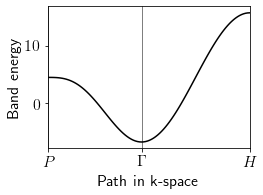

In [10]:
# First make a figure object
fig, ax = plt.subplots(figsize=(4.,3.))

# specify horizontal axis details
ax.set_xlim([0,k_node[-1]])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')

# plot bands
ax.plot(k_dist,evals[0],color='k')
# put title
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
# make a PDF figure of a plot
fig.tight_layout()
#fig.savefig("li_bsr.pdf")

plt.show()